# Basic Ideas
Random forests is a substantial modification of bagging that builds a large collection of de-correlated trees, and then averages them.

## Definition of Random Forests
**Bagging**: The essential idea in bagging is to average many noisy but approximately unbiased models, and hence reduce the variance. *Trees* are ideal candidates for bagging, since they can capture complex interaction structures in the data, and if grown sufficiently deep, have relatively low bias.

>A complicated decision tree (e.g. deep) has low bias and high variance. The bias-variance tradeoff does depend on the depth of the tree.


A visual representation of the terms bias and variance             |   A curve of squared bias vs variance showing the inverse correlation 
:-------------------------:|:-------------------------:
<img src="./images/bias-var.png" width=250> | <img src="./images/bias-var2.png" width=300>

An average of B i.i.d. random variables, each with variance $\sigma^2$, has variance $\frac{1}{B^2}$. If the variables are simply i.d. (identically distributed, but not necessarily independent) with positive pairwise correlation $\rho$, the variance of the average is:

\begin{align}
\rho\sigma^2+\frac{1-\rho}{B}\sigma^2
\end{align}

As B increases, the second term disappears, but the first remains, and hence the size of the correlation of pairs of bagged trees limits the benefits of averaging. 

### Intuition of random forests
The idea in random forests is to improve the **variance reduction of bagging** by **reducing the correlation between the trees**, without increasing the variance too much. This is achieved in the tree-growing process through *random selection of the input variables*.

### Algorithms of random forests
Specifically, when growing a tree on a bootstrapped dataset:
>Before each split, select m $\leq$ p of the input variables at random
as candidates for splitting.

Typically values for m are $\sqrt{p}$ or even as low as 1.

After B such trees $\{T(x;\theta_b)\}_1^B$are grown, the random forest (regression)
predictor is:

\begin{align}
\hat{f}_{rf}^B(x)=\frac{1}{B}\sum_{b=1}^BT(x;\theta_b)
\end{align}

$\theta_b$ characterizes the bth random forest tree in terms of split variables, cutpoints at each node, and terminal-node values.

Intuitively, reducing m will reduce the correlation between any pair of trees in the ensemble, and hence reduce the variance of the average.

<img src="./images/rf1.png" width=400> 


In Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random, by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

# Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('./data/Position_Salaries.csv')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1:].values

# Feature scaling
from sklearn.preprocessing import StandardScaler
stan_x=StandardScaler()
stan_y=StandardScaler()
X=stan_x.fit_transform(X)
y=stan_y.fit_transform(y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
#Fitting random forests
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X,y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

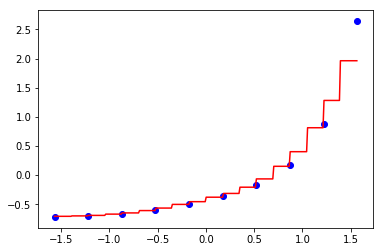

In [3]:
#Plot
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape((X_grid.shape[0],1))
plt.scatter(X,y,color='blue')
plt.plot(X_grid,regressor.predict(X_grid),color='red')

In [4]:
regressor.predict([[6.5]])

array([1.96177845])

# Questions
## What is the advantage and drawback of Random Forests compared to Decision Trees? 
**Advantage:** Random Forests can give you a better predictive power than Decision Trees.
**Drawback: **Decision Tree will give you more interpretability than Random Forests, because you can plot the
graph of a Decision Tree to see the diﬀerent splits leading to the prediction, as seen in the Intuition Lecture.
That’s something you can’t do with Random Forests.

## When to use Random Forest and when to use the other models?
The best answer to that question is: try them all!

However , if you want some shortcuts, here are some rules of thumbs to help you decide which model to
use:

1. you need to ﬁgure out whether your problem is linear or non linear. You will learn how to do that in Model Selection.
 - If your problem is linear, you should go for Simple Linear Regression if you only have one feature, and Multiple Linear Regression if you have several features.
 - If your problem is non linear, you should go for Polynomial Regression, SVR, Decision Tree or Random Forest. Then which one should you choose among these four? That you will learn in Part 10 - Model Selection. 
 
2. The method consists of using a very relevant technique that evaluates your models performance,called **k-Fold Cross Validation**, and then picking the model that shows the best results. 

## How do I know how many trees I should use?
1. I would recommend to choose the number of trees by experimenting. It usually takes less time than we think to ﬁgure out a best value by tweaking and tuning your model manually. That’s actually what we do in general when we build a Machine Learning model: we do it in several shots, by experimenting several values of hyperparameters like the number of trees. 
2. k-Fold Cross Validation and Grid Search, which are powerful techniques that you can use to ﬁnd the optimal value of a hyperparameter, like here the number of trees.